# Homework 2: Linear Regression & Classification

**Due date**: Feburary 14, Wednesday by 11:59pm


In this homework, we will investigate supervised machine learning problems: linear regression and linear classification. We will focus on translating derivation / mathematical expressions into Python Programs efficiently. In particular, we will explore the **broadcasting, vectorization** and the usage of **linear algebra functions** in `numpy.linalg`.

We will use the same notation as in class. We have $N$ number of training data $(\mathbf{x}_1, y_1), (\mathbf{x}_2, y_2), \cdots, (\mathbf{x}_N, y_N)$, where $\mathbf{x}_i \in \mathbb{R}^d$ is a $d$-dimensional feature vector. $y_i \in \mathbb{R}$ is the target for regression problem, and $y_i \in \{-1, +1\}$ in binary classification problem.

In both cases, we want to build a linear model parameterized with a weight vector $\mathbf{w} \in \mathbb{R}^d $.

**Notes :** We left some output for reference so you can compare your implementation. But be mindful that there are many ways to implement a single task, hence it is totally possible that your output is correct but does not match exactly with the one being provided. For example, sometimes there will be numpy array with dimension (200, 1) or (200, ). They can be both correct, as long as your code works as an entity.



## **Question 1:** Variation of Linear Regression (5 pts)
In class, we motivated linear regression as finding a linear model that fits the best to data. That is we make predictions $\hat{y}_i = \mathbf{x}_i^T \mathbf{w}$. Mathematically, we want to find a $\mathbf{w}$ that minimizes a loss function $L(\mathbf{w})$: the mismatch between the prediction and the target,
\begin{align*}
L(\mathbf{w}) = \frac{1}{N} \sum_{i=1}^{N} (\hat{y}_i - y_i)^2
\end{align*}
This particular loss is so called square loss as each summands represents a square error between the prediction and the target, so linear regression is also named as least square regression.

We write the data set in matrix form $X \in \mathbb{R}^{N \times d}$ and $Y \in \mathbb{R}^N$:
\begin{align*}
X = \begin{bmatrix} x_{1,1} & x_{1,2} & \cdots & x_{1,d} \\
x_{2,1} & \ddots & & \vdots\\
\vdots & & \ddots & \\
x_{N,1} & \cdots & & x_{N,d}
\end{bmatrix} = \begin{bmatrix}
- \mathbf{x}_1^T - \\
- \mathbf{x}_2^T - \\
\vdots\\
- \mathbf{x}_N^T - \\
\end{bmatrix}, \quad \quad Y = \begin{bmatrix}y_1\\
y_2\\
\vdots\\
y_N
\end{bmatrix}
\end{align*}

In this question, we are going to derive variants of linear regression.

#### 1.a. Derive the formula for the weight vector for the ordinary least square estimator. **You may use without proof the fact that for any matrix $X$, the pseudoinverse $(X^\top X)^{-1}$ is invertible** (2 pts)

The weight vector, $\mathbf{w}$, can be efficiently solved by writing $L(\mathbf{w})$ in matrix form, and the derived solution for least square regression was
\begin{align*}
\mathbf{w} = (X^T X)^{\ddagger} X^T Y
\end{align*}

where $(X^\top X)^{\ddagger}$ indicates the pseudoinverse. Prove and show why this is true. Hint: you might need to know the gradient of $w\mapsto w^\top A w$. You could look it up in the [matrix cookbook](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf) (the book calls the gradient a "derivative" of a vector, so $\nabla F(x)$ is written $\frac{\partial F(x)}{\partial x}$).

**Solution:**

We may begin by understanding that we can obtain $\hat{y}$ by means of the following matrix multiplication:

$$
X \cdot w = \hat{y}.
$$

(Where $X$ is our feature matrix, $w$ is our weight vector, and $\hat{y}$ is our predicted values vector.)

Proceeding, we must solve for $w$. It is not possible to simply multiply $X$ by its inverse as $X$ is not necessarily a square matrix. Therefore, we must convert it into an invertible matrix by multiplying $X$ with $X^T$.

Thus:

$$
X \cdot X^T \cdot w = \hat{y} \cdot X^T
$$

We can further prove this by understanding that in order to find the right weight vector, the loss function must be minimized. To do this, we may take the gradient of the loss function:

$$
\nabla L(w) = \frac{1}{N}(2X^T Xw - 2X^T y)
$$

and by setting this to 0, we can simplify to:

$$
X^T Xw = X^T y
$$

where we can obtain $w$ by:

$$
w = (X^T X)^{-1}X^T y
$$

Even if $X^T X$ is not invertible, $X^T X + \lambda I$ is always invertible. In which case, taking the limit as lambda goes to 0 by pseudo-inverse gives us:

$$
\mathbf{w} = (X^T X)^{\dagger} X^T y
$$


#### 1.b. Derive a new weight vector (3 pts)

Considering the following loss function $L_{\lambda}(\mathbf{w})$ for some positive value $\lambda$
\begin{align*}
L_{\lambda}(\mathbf{w}) = \frac{1}{N} \sum_{i=1}^{N} (\hat{y}_i -y_i)^2 + \lambda \mathbf{w}^T \mathbf{w}
\end{align*}
Following the same principle in part a for the least square derivation, deriving the corresponding solution for $L_{\lambda}(\mathbf{w})$ and denote your final solution as $\mathbf{w}_{\lambda}$.



**solution:**

Alright I have no idea if its right or not but I did my best:

$\mathbf{w}_{\lambda} = X^T y(X^T X + {\lambda}I)^{-1}$

Assuming that N != 0 we can get rid of it by dividing 0 by N.

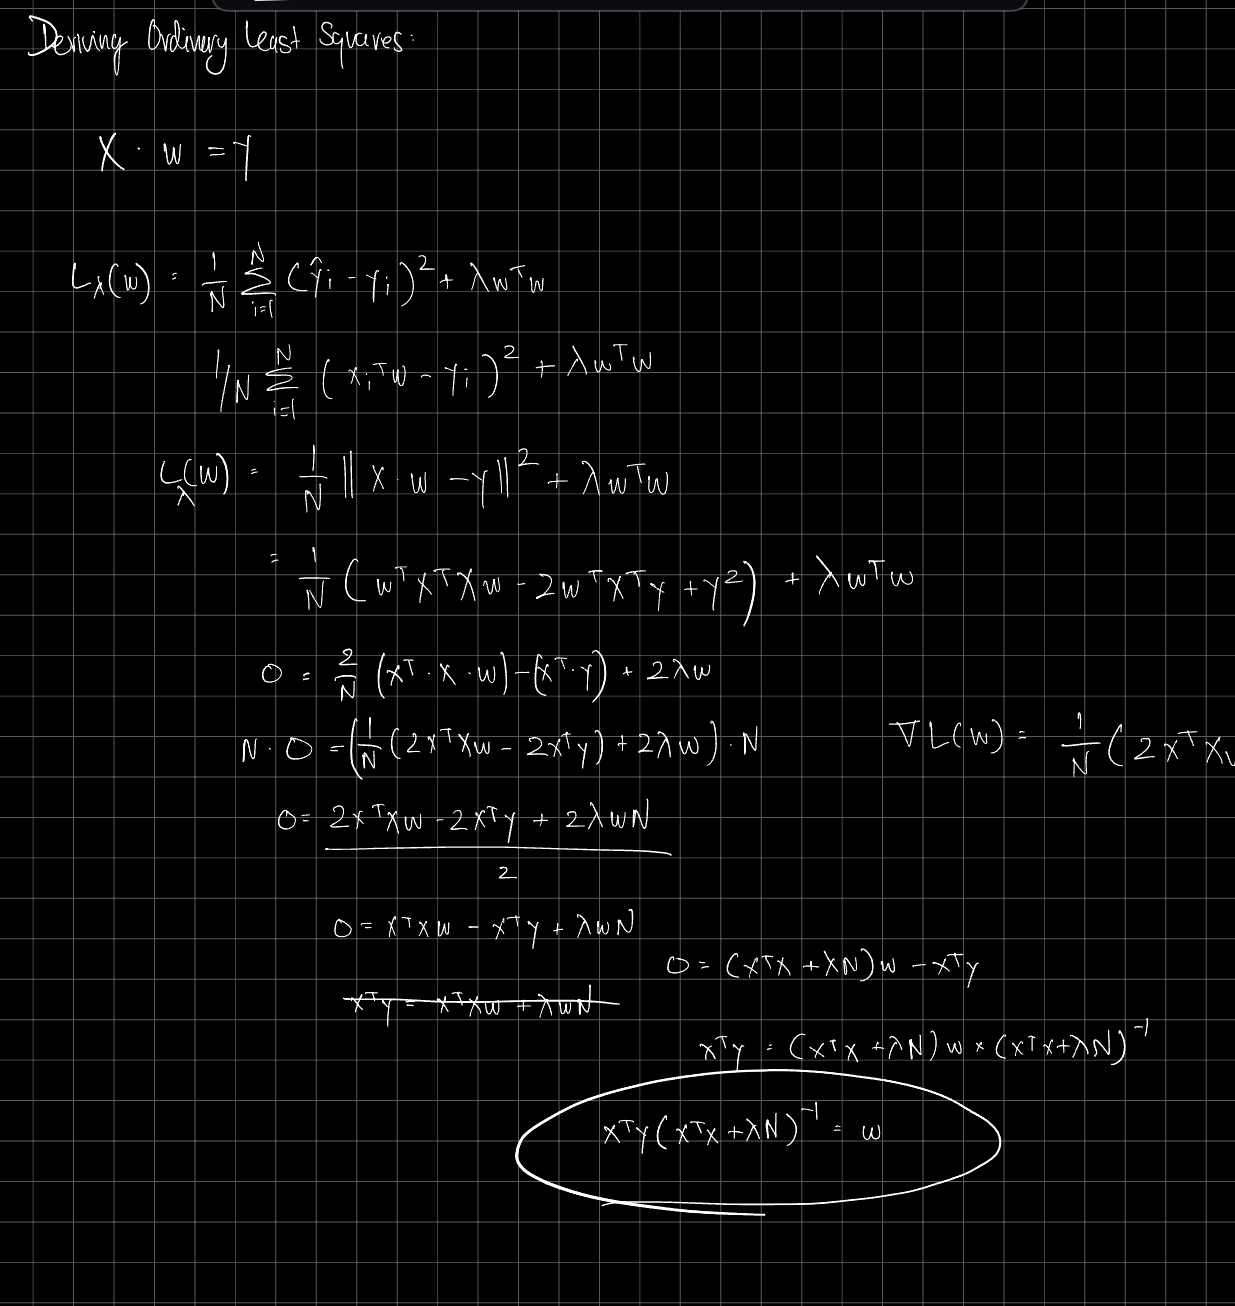




## **Question 2:** Computational Comparision between $\mathbf{w}$ and $\mathbf{w}_{\lambda}$ (25 pts)

This question is an implementation of the solutions from question 1. We use $\mathbf{w}$ to denote the least square solution we derived from question 1.a, and $\mathbf{w}_\lambda$ to denote the solution derived from question 1.b. **Note :** if you did not manage to do question 1, you can use the expression for ridge regression in Lecture 5 as $\mathbf{w}_{\lambda}$.

We will perform linear regression on California Housing data: that is a data set containing 8 predictive features, and we use 'MedHouseVal' (Median House Value) as the target. This data set contains 20640 training examples. So in our notation, we have $N = 20640, d = 8$. More information can be found from: https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html

In class, we studied a way to include bias $b$ for least square regression, that is to make prediction by computing $\hat{y}_i = \mathbf{x}_i^T \mathbf{w} + b $. We observed that this can be simply achieved in matrix form by augmenting our data matrix $X$ and weight vector $\mathbf{w}$ using block matrix. That is
\begin{align*}
\tilde{X} = \begin{bmatrix}
\mathbf{1}_N, X
\end{bmatrix}, \quad \quad \mathbf{\tilde{w}} = \begin{bmatrix} b \\
\mathbf{w}
\end{bmatrix}
\end{align*}
where $\mathbf{1}_N$ is a $N$-dimensional vector filled with ones. By doing so, our derivation from question 1 still holds. To ease the notation, we will overload
\begin{align*}
X \leftarrow \begin{bmatrix}
\mathbf{1}_N, X
\end{bmatrix}, \quad \quad \mathbf{w} \leftarrow  \begin{bmatrix} b \\
\mathbf{w}
\end{bmatrix}
\end{align*}

**Tips :** You might find keeping track of dimension helpful in coding/debugging scripts here.

#### 2.a. Load data and Preparation(5 pts)

Complete the following function that loads California housing data from `sklearn`, and augments the feature matrix as shown above. The function should return `X`, which stores the augmented feature matrix, and `Y`, which stores the target values.

In [79]:
from sklearn import datasets
import numpy as np


def wLam(X, lam, N, y):
  return (X.T*X + np.linalg.pinv((lam*N*np.identity)))

def wLamDos(X, lam, N, y):
  return (X.T*X + np.linalg.pinv((lam*N)))

def wStar(X, lam, y):
  return np.linalg.inv(((lam) + X.T*X)) * (X.T * y)


def load_data():
  '''
  This function loads the California housing dataset and augments the feature
  matrix, X, by adding a column of ones.
  '''
  ### Complete the code here:
  from sklearn.datasets import fetch_california_housing
  california_housing = fetch_california_housing(return_X_y=True)
  rows = (np.shape(california_housing[1]))
  ones = np.ones((rows[0], 1))
  X = np.hstack((ones, california_housing[0]))
  Y = np.reshape(california_housing[1], (rows[0], 1))
  return X,Y

load_data()


X, Y = load_data()
print(X.shape)
print(Y.shape)

(20640, 9)
(20640, 1)


#### 2.b. Compute $\mathbf{w}$ and $\mathbf{w}_\lambda$ **using the equations you derived in problem 1**(5 pts)

Complete the following two functions

1.   `least_square(X, Y)`: Given `X`, `Y` as input and returns $\mathbf{w}$
2.   `variant_least_square(X, Y, lam)`: Given `X`, `Y`, `lam`: $\lambda$ as input and return $\mathbf{w}_\lambda$



In [80]:
def least_square(X, Y):
    '''
    A function returns the solution of least squre regression w
    '''
    ### Complete the code here
    pinv = np.linalg.pinv(X.T@X)
    w = pinv@(X.T@Y)

    return w




# test your code here:
w = least_square(X, Y)
print('The shape of w is', w.shape)
print('w is', w)
'''
Do not modify anything here. This is just to demonstrate that we can also use
np.linalg.solve() to solve for the w vector. It creates fewer floating-point
errors compared to other approach you use with the equations.
'''
X_transpose = np.transpose(X)
A = np.dot(X_transpose, X)
b = np.dot(X_transpose, Y)
w_linalg = np.linalg.solve(A, b)
print('\nw_linalg is', w_linalg.reshape(-1,1))


The shape of w is (9, 1)
w is [[-3.69419207e+01]
 [ 4.36693292e-01]
 [ 9.43577795e-03]
 [-1.07322040e-01]
 [ 6.45065691e-01]
 [-3.97638957e-06]
 [-3.78654264e-03]
 [-4.21314382e-01]
 [-4.34513760e-01]]

w_linalg is [[-3.69419202e+01]
 [ 4.36693293e-01]
 [ 9.43577803e-03]
 [-1.07322041e-01]
 [ 6.45065694e-01]
 [-3.97638942e-06]
 [-3.78654265e-03]
 [-4.21314378e-01]
 [-4.34513755e-01]]


In [81]:
def variant_least_square(X, Y, lam):
    '''
    A function returns the solution of least squre regression w
    '''
    ### Complete the code here
    n, p = X.shape
    b = np.linalg.inv(lam * np.eye(p) + X.T @ X) @ X.T @ Y
    return b

# test your function here:
w_lam = variant_least_square(X, Y, 1)
print(w_lam.shape) #works!

(9, 1)


#### 2.c. Compute the loss function (5 pts)

Often we use the loss function value on the testing set to comment on the quality of the fitted line. Here we compute the loss function to observe the effect of $\lambda$ later.

Complete the following function `loss_fct(X, Y, w, lam)` which returns $L_{\lambda}(\mathbf{w})$. For full credit, complete the function here without a loop.

In [82]:
def loss_fct(X, Y, w, lam):
    '''
    A function to return the value of L_{λ} evaluated at w
    '''
    ### Complete the code here
    yhat = X@Y
    N = len(Y)
    constant = lam*(w.T@w)
    loss = (np.sum((Y - yhat) ** 2) / N) + constant
    return loss


Although the above function was written to compute $L_{\lambda}(\mathbf{w})$. Observe the formula for $L(\mathbf{w})$, use the function above to compute $L(\mathbf{w})$ and store the value to `loss`.

*   In particular, recall we stored least square regression solution in `w` previously.
*   What value should $\lambda$ take in order for $L(\mathbf{w}) = L_{\lambda}(\mathbf{w})$

In [83]:
### Complete the code here
def loss_fct(X, Y, w, lam):
    '''
    A function to return the value of L_{λ} evaluated at w
    '''
    ### Complete the code here
    yhat = X@w
    N = len(Y)
    constant = lam*(w.T@w)
    loss = float(np.sum((Y - yhat) ** 2) / N) + constant
    return loss[0]


loss = loss_fct(X,Y,w, lam=0)
print(loss)

[0.52432099]


#### 2.d. The effect of $\lambda$ (5 pts)

In this section, we will observe the effect of $\lambda$ by comparing:

1.   $L(\mathbf{w})$ and $L_{\lambda}(\mathbf{w}_{\lambda})$
2.   $\|\mathbf{w}\|$ and $\|\mathbf{w}_{\lambda}\|$
using different value of $\lambda$.

Complete the following function that computes $\mathbf{w}_{\lambda}$, $L_{\lambda}(\mathbf{w}_{\lambda})$, and $\|\mathbf{w}_{\lambda}\|$ when $\lambda$ takes values from `lam_list` in turn. Store the values computed for $L_{\lambda}(\mathbf{w}_{\lambda})$ and $\|\mathbf{w}_{\lambda}\|$ in `loss_list` and `w_norm_list`, respectively.

In [84]:
lam_list = [10**-7, 10**-6, 10**-5, 10**-4, 10**-3]
loss_list = []
w_norm_list = []


### after your code runs, loss_list[i] should be equal to L(w_lam_list[i])
### and w_norm_list[i] should be || w_lam_list[i] ||.

def compute_loss_and_w_norm(list, X, Y):
  '''
  This function computes and stores the loss and norm of weights for different
  lambda values. Consider which parameters you should pass into the function.

  It returns two lists:
  One containing the loss for each lambda, and the other containing the norm of
  w for each lambda.
  '''
  ### Complete your code here:
  L = []
  N = []
  for i in lam_list:
    w_lam = (variant_least_square(X,Y,i))
    #calculate weights
    L.append(loss_fct(X,Y, w_lam, lam=i)[0])
    N.append(np.linalg.norm(w_lam))
  return L, N

    
 

loss_list, w_norm_list = compute_loss_and_w_norm(lam_list, X, Y)
print(loss_list)
print(lam_list)
print(w_norm_list)


[0.5244575551828963, 0.5256866741340205, 0.5379776623330333, 0.6608674156106171, 1.8877545714751942]
[1e-07, 1e-06, 1e-05, 0.0001, 0.001]
[36.95524296884589, 36.95521545544774, 36.95494032325399, 36.952189228616184, 36.92470081998793]


Plot `loss_list` (y-axis) along `lam_list` (x-axis) below (just for the sake of checking syntax). This is a checking block that numpy array dimension might be problematic for the subsequent operation.

If you have trouble plotting, it might be the data type / array dimension returned from your previous functions is not supported by the plot function. Try to see whether you can fix it.   

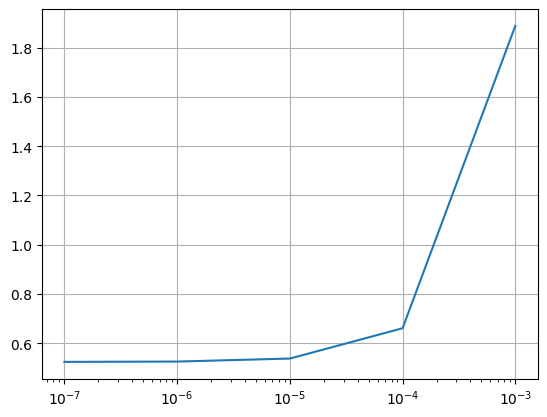

In [85]:
from matplotlib import pyplot as plt

x =[0.5244575551828963, 0.5256866741340205, 0.5379776623330333, 0.6608674156106171, 1.8877545714751942]
y = [1**-7, 1**-6, 1**-5, 0.0001, 0.001]
plt.plot(lam_list, loss_list)
plt.grid(True)
plt.xscale("log")
### Complete the code here


If your code above was implemented correctly, you should have the same plot by running the cell below. Since $\mathbf{w}$ is the solution of least square regression, which does not depend on the value $\lambda$, we plot the value of $\mathbf{w}$ as a straight line along $\lambda$ as a reference to $\mathbf{w}_{\lambda}$

If you do not end up with the same plots as the one provided, answer question 2.e. with the originally provided plots.

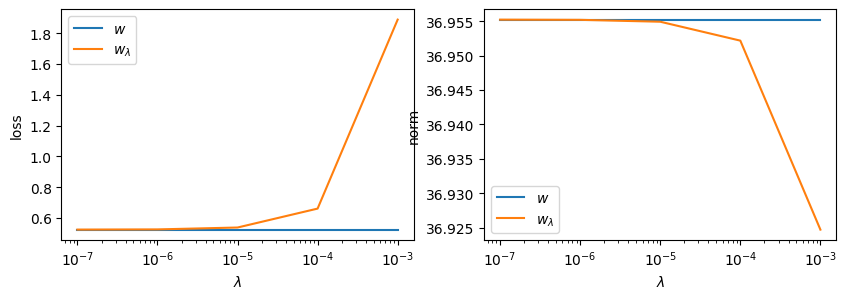

In [86]:
# loss value (left) and norm value (right) comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

ax1.plot(lam_list, np.repeat(loss, len(loss_list)), label = r'$w$')
ax1.plot(lam_list, loss_list, label = r'$w_{\lambda}$')
ax1.set_xlabel(r'$\lambda$')
ax1.set_ylabel('loss')
ax1.legend()
ax1.set_xscale('log')

ax2.plot(lam_list, np.repeat(np.linalg.norm(w), len(loss_list)), label = r'$w$')
ax2.plot(lam_list, w_norm_list, label = r'$w_{\lambda}$')
ax2.set_xlabel(r'$\lambda$')
ax2.set_ylabel('norm')
ax2.legend()
ax2.set_xscale('log')



#### 2.e. Reflection (5 pts)

In the linear regression lecture (Lecture 2), we derived algebraically $\|\mathbf{w}_{\lambda}\| \rightarrow \|\mathbf{w}\|$ as $\lambda \rightarrow 0$.
Observe the plots produced from question 2.d. From the optimization with regularization point of view:


1.   Comment on the value on $L(\mathbf{w}_{\lambda})$ comparing to that of $L(\mathbf{w})$ as $\lambda$ increases. Why this is happening.
2.    Comment on the value on $\|\mathbf{w}_{\lambda}\|$ comparing to that of $\|\mathbf{w}\|$ as $\lambda$ increases. Why this is happening.



**solution:**

1. The loss of w_lambda increases as lambda increases. This is because as lambda increases, the penalty for larger coefficients increase, thereby increasing loss as its deviating from what we got from the MSE loss.


2. The norm of w_lambda decreases as lambda increases. This is because the regularisation parameter generally decreases variance at cost of increasing bias.

## **Question 3:** An Alternative View of Perceptron Algorithm (20 pts)

In class, we described the perceptron algorithm as a linear classifier making prediction by $$\hat{y}_i = \text{sign}( \mathbf{x}_i^T \mathbf{w})$$

To find a good $\mathbf{w}$, we motivated to update $\mathbf{w}$ iteratively through a rule. At each iteration $t$ we see a data $\mathbf{x}_t$ and make a prediction $\hat{y}_t$:


*   If we make a mistake , we update $\mathbf{w} \leftarrow \mathbf{w} + y_t \mathbf{x}_t$
*   If we $\hat{y}_t = \hat{y}_t$, we don't change $\mathbf{w}$

We explored these updating rules through vector addition point of view in lecture 3 (Linear Classification). In this question, we will rediscover the perceptron algorithm as a special case of stochastic gradient descent.




#### 3.a. Understanding the Loss function (5 pts)

Suppose we set the loss function $$\ell_t(\mathbf{w}) = \max (0, -y_t \mathbf{x}_t^T \mathbf{w} )$$

Why do we set the loss function to be $\max (0, -y_t \mathbf{x}_t^T \mathbf{w} )$, as opposed to $\max (10, -y_t \mathbf{x}_t^T \mathbf{w} )$?




**solution:**

This function would always penalize the model by 10, regardless of the margin of misclassification.




#### 3.b. The corresponding gradient (5 pts)

Compute the gradient of $\ell_t$ with respective to $\mathbf{w}$. Write the gradient $\nabla \ell_t (\mathbf{w})$ as a piecewise function in terms of $\text{sign}(y_t \mathbf{x}_t^T \mathbf{w})$. You do not need to compute the gradient at points of non-differentability.

**solution:**

0, if -y * x.T <= 0

-y * x.T, if y * x.T > 0


#### 3.c. The Missing Case (5 pts)

In question 3.b., we computed gradients as a piece-wise function in terms of $\text{sign}(y_t \mathbf{x}_t^T \mathbf{w})$. We might be missing one case, that is $\text{sign}(y_t \mathbf{x}_t^T \mathbf{w}) = 0$. (If you did not notice this potential issue, give your solution another thought).

Observe the plot in question 3.a., the loss function $\ell_t(\mathbf{w})$ is not differentiable at 0, so we need to compute the sub-gradient. (sub-gradients is a name for "gradient-like" vector we use at a point where the function is not differentiable).

Suppose now you are given $\nabla \ell_t (\mathbf{w})$ when $\text{sign}(y_t \mathbf{x}_t^T \mathbf{w}) = 0 $
can either be


1.   the gradient when $\text{sign}(y_t \mathbf{x}_t^T \mathbf{w}) < 0$
2.   the gradient when $\text{sign}(y_t \mathbf{x}_t^T \mathbf{w}) > 0$.

Which one would you choose and why?

**Hint :** think about what happens if $\mathbf{w} = 0$ ?


**solution:**

1. the gradient when < 0

I say this because then if w = 0, the hyperplane would be a horizontal line at y = 0. In which case it separates the negative from the positive. So, everything negative and at 0 are classified the same.


#### 3.d. Formulate the Stochastic Gradient Descent Step (5 pts)

Write down the stochastic gradient descent formula for updating $\mathbf{w}_{t+1}$ from $\mathbf{w}_t$ using the results from previous 2 sub-questions. Use $\eta_t$ to represent the learning rate at time step $t$

Your solution should be a piece-wise function in terms of $\text{sign}(y_t \mathbf{w}_t^T \mathbf{x}_t)$

**solution:**

w + 0, if -y * x.T <= 0

w +  $\eta_t$(-y * x.T), if y * x.T > 0


(im sorry idk if this is right)


## Question 4: Perceptron Implementation (15 pts)

In this question, we will implement the derived perceptron algorithm from Question 3. As well as exploring some theoretical concepts learnt in class. If you did not manage to derive perceptron algorithm in question 3, use the version seen in Lecture 3.

Your implementation should make prediction $\hat{y} = \text{sign} ( \mathbf{x}^T \mathbf{w})$. In practice, we usualy make prediction by including a bias term $b$ in order to introduce more flexibility to the model. This can be simply achieved by augmenting data matrix as we did in question 1 and 2. But for this question, we will work with a nice dataset and perceptron should performs well even without the bias term.


#### 4.a. Hello World: The First Training Loop (5 pts)

The learning rate, $\eta$, is a hyperparameter that controls the step size at each iteration while moving toward a minimum of a loss function. It influences how much the weights of the model are updated during training. The standard perceptron algorithm usually employs a fixed learning rate. However, for this specific problem, we will explore the use of adaptive learning rates, where the learning rate changes based on the iteration count.

Complete the learning rate functions below so that they implement the following twofunctions, where $t$ is the current iteration number and $T$ is the total number of iterations.
\begin{align*}
\eta_1(t) &= \frac{1}{\sqrt{t}} \\
\eta_2(t) &= \frac{T-t}{T}
\end{align*}

##### Some Background Info:
There is a huge amount of research that has gone into understanding what the right learning rate should be. Until very recently, the standard mathematical analysis of SGD usually suggested that $\eta_1(t)$ was the best learning rate (see https://cdn.aaai.org/ICML/2003/ICML03-120.pdf Theorem 1 for this classical result and analysis). However, in practice, it is common to use different learning rates, such as the $\eta_2(t)$ above because usually they perform much better. It was only just *last summer* that any mathematical explanation for this behavior was discovered (see https://arxiv.org/abs/2307.11134, https://arxiv.org/abs/2310.07831).


In [87]:
def eta_function_1(T, t):
  ### Complete your code here
  # Note that eta_1(t) only takes in one input argument, t, but for keeping
  # consistency between the two eta functions, we will have both T and t as inputs
    return 1/(t**(1/2))

def eta_function_2(T, t):
  ### Complete your code here
    return (T-t)/T





Now complete `train(X, Y, eta_function)`. This function should resemble stochastic gradient descent (SGD) formula derived in question 3.d. over one **epoch**. An epoch in machine learning refers to one complete pass through the entire training data. For SGD with dataset size $N$, one epoch means $N$ gradients update. $E$ epochs means looping over the dataset $E$ times, resulting in $N \times E$ gradient updates.

You do not need to shuffle your data here.


In [123]:
import numpy as np

def train(X, Y, eta_function):

    """
    A function to train the derived perceptron using SGD from question 3
    over 1 epoch. The weights are initialized to zero.

    Arguments:
        X: the training data in matrix form
        Y: the training label in matrix form
        eta_function: a function to set the learning rate

    Returns:
        w: the last iterate of the separating hyperplane parameter
    """

    num_features = X.shape[1]
    w = np.zeros(num_features)
    T = 0
    for i in range(X.shape[0]):
        T = T + 1
        x_i = X[i]
        y_i = Y[i]
        yhat = np.sign((np.dot(w, x_i.T)))
        if yhat <= 0:
            yhat = 0
        else:
            yhat = 1
        if int(yhat) != int(y_i):
            if eta_function == 1:
                eta = eta_function_1(T=0, t=i)
            elif eta_function == 2:
                eta = eta_function_2(T, t=i)
            w += eta * (y_i - yhat) * x_i  

    return w


#### 4.b. Evaluation function (3 pts)

Completing `eval_acc` function, which evaluate the prediction accuracy.  For full credit, use numpy vectorized calculations rather than a for loop.

In [124]:
import numpy as np

def eval_acc(X, Y, w):        
    yhat = np.where(np.sign((np.dot(w, X.T))) > 0, 1, 0)  
    cp = np.sum(yhat == Y)
    acc = cp / X.shape[0]
    return acc


#### 4.c. Train the Classifier (2 pts)

We will use functions written in question 4.a. and 4.b. to train the perceptron algorithm. We will be using the breast cancer dataset for binary classification purpose: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

The data importing and processing steps have been completed for you. Write the code to train your model with $\eta_1(t) = \frac{1}{\sqrt{t}}$. Print out the training accuracy.
**Note** that the original dataset has labels {0,1}, which do not match our model assumptions.

In [125]:
# import data
dataset = datasets.load_breast_cancer()

# preprocess data:
# Split data into feature vectors and labels
X = dataset.data
Y = dataset.target

#### Complete your code here
p = train(X, Y, 1)
eval_acc(X,Y,p)


0.9050966608084359

#### 4.d. Scaled Classifier (3 pts)

In the previous part, we trained our classifiers and obtained a `w` vector. Now define a new variable `w_scaled = w * s` for some arbitrary positive scaling factor `s`. Should this improve, worsen, or not impact the training accuracy? Explain.

In [126]:
### Complete the code here
s = 2
w_scaled = w*s

**solution:**
This will not have an effect. The hyperplane is useful because if its angle/direction, not its magnitude.


#### 4.e Impact of $\eta$ (2 pts)


Now try training another `w` with $\eta_2(t) = \frac{T-t}{T}$. Print out the new training accuracy.
Which of the $\eta$ functions results in better performance? Can you speculate on why one might be better than another (no need to be mathematically precise - just suggest some reasons that might cause one learning rate to outperform another one).

In [127]:
#### Complete your code here
newtrain = train(X, Y, 2)
print(eval_acc(X,Y, newtrain))


0.7978910369068541


**solution:**
